In [2]:
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)

In [3]:
mimic_notes_tables = [os.path.basename(i) for i in glob("../*.csv.gz")]
mimic_notes_tables

['ICUSTAYS.csv.gz',
 'MICROBIOLOGYEVENTS.csv.gz',
 'PROCEDUREEVENTS_MV.csv.gz',
 'PRESCRIPTIONS.csv.gz',
 'DRGCODES.csv.gz',
 'D_LABITEMS.csv.gz',
 'D_ICD_DIAGNOSES.csv.gz',
 'PATIENTS.csv.gz',
 'CALLOUT.csv.gz',
 'PROCEDURES_ICD.csv.gz',
 'DATETIMEEVENTS.csv.gz',
 'D_ICD_PROCEDURES.csv.gz',
 'NOTEEVENTS.csv.gz',
 'D_CPT.csv.gz',
 'D_ITEMS.csv.gz',
 'SERVICES.csv.gz',
 'CHARTEVENTS.csv.gz',
 'LABEVENTS.csv.gz',
 'DIAGNOSES_ICD.csv.gz',
 'ADMISSIONS.csv.gz',
 'CAREGIVERS.csv.gz',
 'TRANSFERS.csv.gz',
 'CPTEVENTS.csv.gz',
 'INPUTEVENTS_MV.csv.gz',
 'OUTPUTEVENTS.csv.gz',
 'INPUTEVENTS_CV.csv.gz']

In [4]:
patients = pd.read_csv("../PATIENTS.csv.gz", compression="gzip", low_memory=False)

In [5]:
patients.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


In [6]:
patients.shape

(46520, 8)

In [7]:
notes = pd.read_csv("../NOTEEVENTS.csv.gz", compression="gzip", low_memory=False)

In [8]:
notes.head()

ROW_ID  SUBJECT_ID   HADM_ID   CHARTDATE CHARTTIME STORETIME  \
0     174       22532  167853.0  2151-08-04       NaN       NaN   
1     175       13702  107527.0  2118-06-14       NaN       NaN   
2     176       13702  167118.0  2119-05-25       NaN       NaN   
3     177       13702  196489.0  2124-08-18       NaN       NaN   
4     178       26880  135453.0  2162-03-25       NaN       NaN   

            CATEGORY DESCRIPTION  CGID  ISERROR  \
0  Discharge summary      Report   NaN      NaN   
1  Discharge summary      Report   NaN      NaN   
2  Discharge summary      Report   NaN      NaN   
3  Discharge summary      Report   NaN      NaN   
4  Discharge summary      Report   NaN      NaN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [9]:
"The number of patients whose notes are stored %s"%(len(notes['SUBJECT_ID'].unique()))

'The number of patients whose notes are stored 46146'

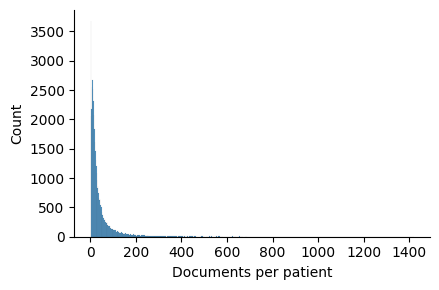

In [10]:
import seaborn as sns

documents_per_patient = notes.groupby(['SUBJECT_ID'])['SUBJECT_ID'].count().sort_values()
sns.displot(documents_per_patient, kde=False, height=3, aspect=1.5);
plt.xlabel("Documents per patient");

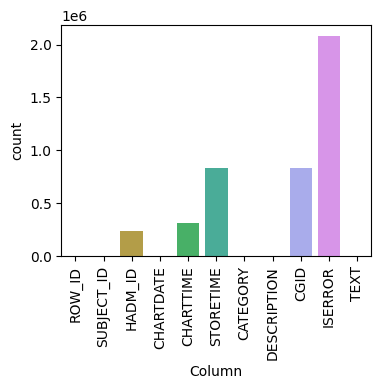

In [11]:
#check the extentt of missing values
plt.figure(figsize=(4,3))
empt_df = notes.isnull().sum().reset_index().rename(columns={0:'count'})
sns.barplot(data=empt_df, x='index', y='count');
plt.xticks(rotation=90);
plt.xlabel("Column");

In [12]:
#check sample of notes
notes[['TEXT']][:2]

TEXT
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

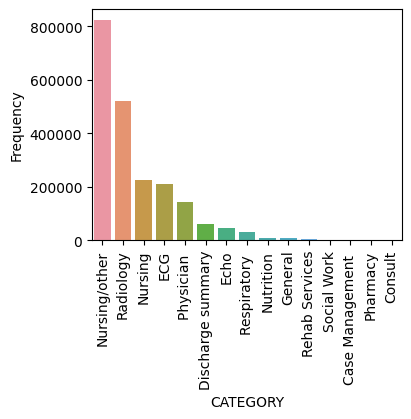

In [13]:
plt.figure(figsize=(4,3))
category = notes['CATEGORY'].value_counts().reset_index().rename(columns={"index":"CATEGORY", "CATEGORY":"Frequency"})
sns.barplot(category, x="CATEGORY", y="Frequency");
plt.xticks(rotation=90);

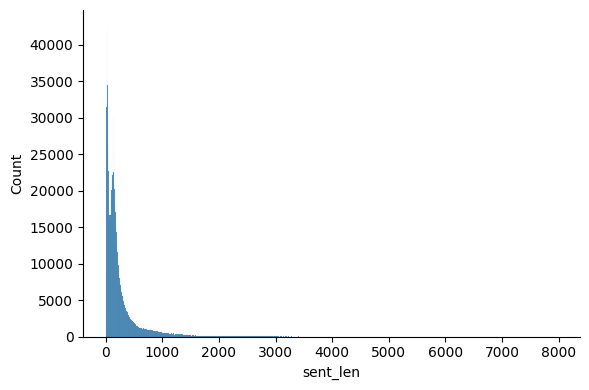

In [14]:
notes['sent_len'] = notes['TEXT'].apply(lambda s: len(s.split()))
sns.displot(notes['sent_len'], kde=False, height=4, aspect=1.5);

In [15]:
import re
import spacy

In [16]:
def clean_up(s):
    s = re.sub(r"[\n]+", " ", s)
    s = re.sub(r"(\[\*\*)|(\*\*\])", "", s)
    s = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "", s)
    s = re.sub(r"\s+", " ", s)
    return s

In [17]:
notes['cleaned'] = notes['TEXT'].apply(lambda s:clean_up(s))

In [18]:
notes.iloc[:2,-2:]

sent_len  \
0       110   
1      1943   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import json 

from matplotlib import pyplot as plt
from medcat.cat import CAT
from medcat.cdb import CDB
from medcat.config import Config
from medcat.vocab import Vocab
from medcat.meta_cat import MetaCAT
from medcat.preprocessing.tokenizers import TokenizerWrapperBPE
from tokenizers import ByteLevelBPETokenizer

In [20]:
# format the df to match: required input data for multiprocessing = [(doc_id, doc_text), (doc_id, doc_text), ...]
def data_iterator(data):
    for id, row in data[['cleaned']].iterrows():
        yield (id, str(row['cleaned']))

In [ ]:
# Load model pack and Create CAT - the main class from medcat used for concept annotation
# Create the full pipeline with models for meta-annotations
model_pack_path = 'models/medmen_wstatus_2021_oct.zip'
cat = CAT.load_model_pack(model_pack_path)

/home/micheala/v_environs/lib/python3.10/site-packages/spacy/util.py:887: UserWarning: [W095] Model 'en_core_web_md' (3.1.0) was trained with spaCy v3.1 and may not be 100% compatible with the current version (3.5.3). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [23]:
!ls models/

mc_modelpack_snomed_int_16_mar_2022_25be3857ba34bdd5
mc_modelpack_snomed_int_16_mar_2022_25be3857ba34bdd5.zip
medmen_wstatus_2021_oct
medmen_wstatus_2021_oct.zip
umls_self_train_model_e6a3660d3ba19f52.zip
